-----
<div> <center> ESPACIO PARA BANNER DE LA MAESTRIA </center> </div>   

-----

# Introducción al Procesamiento del Lenguaje Natural

Python tiene un paquete llamado `re` el cual nos permite trabajar con expresiones regulares. Sus principales funciones son:

* findall: retorna una lista con todos los matchs dentro del texto.
* search: retorna un objeto de tipo *match* si existe algún match en el texto.
* split: Devuelve una lista donde la cadena se ha dividido en cada match.
* sub: reemplaza una o más coincidencias con el texto deseado.

A su vez, otros paquetes como Pandas tienen métodos que permiten hacer uso de expresiones regulares para modificar el objeto.

En este módulo vamos a hacer un análisis de texto simple sobre el Acuerdo de Paz que firmó el Gobierno de Colombia con el grupo guerrillero FARC-EP en el año 2016

In [153]:
import pdfplumber

# Vamos a proceder a extraer todo el texto del documento
with pdfplumber.open('data/acuerdo_final.pdf') as pdf:
    paginas = pdf.pages
    documento = ""
    for pag in paginas:
        text = pag.extract_text()
        documento = documento + " " + text

In [154]:
# Veamos como se ven los primeros 500 caracteres del texto
print(documento[0:500])

 Acuerdo	Final	
12.11.2016	
ACUERDO	FINAL	PARA	LA	TERMINACIÓN	DEL	CONFLICTO	Y	LA	CONSTRUCCIÓN	DE	UNA	PAZ	
ESTABLE	Y	DURADERA	
	
PREÁMBULO	
Recordando	que	los	diálogos	de	La	Habana	entre	delegados	y	delegadas	del	Gobierno	Nacional,	
presidido	por	el	Presidente	Juan	Manuel	Santos	y	delegados	y	delegadas	de	las	Fuerzas	Armadas	
Revolucionarias	de	Colombia-Ejército	del	Pueblo,	con	la	decisión	mutua	de	poner	fin	al	conflicto	
armado	nacional,	tuvieron	origen	como	resultado	del	Encuentro	Exploratorio	


In [155]:
import unidecode
import re

# Vamos a comenzar con la normalización del texto

# Quitamos tildes
documento = unidecode.unidecode(documento)
# Quitamos comas, guiones y otros caracteres especiales o signos de puntuación
documento = re.sub('[^A-Za-z0-9 ]+', ' ', documento)

Usamos la expresión regular `[^A-Za-z0-9 ]+` para matchear todo lo que no sea un caracter alfanumérico o un espacio y lo reemplazamos con un espacio. (Note la presencia del caret `^` al inicio de los corchetes cuadrados)

In [156]:
# Muestra de como va
print(documento[0:500])

 Acuerdo Final 12 11 2016 ACUERDO FINAL PARA LA TERMINACION DEL CONFLICTO Y LA CONSTRUCCION DE UNA PAZ ESTABLE Y DURADERA PREAMBULO Recordando que los dialogos de La Habana entre delegados y delegadas del Gobierno Nacional presidido por el Presidente Juan Manuel Santos y delegados y delegadas de las Fuerzas Armadas Revolucionarias de Colombia Ejercito del Pueblo con la decision mutua de poner fin al conflicto armado nacional tuvieron origen como resultado del Encuentro Exploratorio sucedido en l


In [157]:
# Ponemos todo el texto en minúscula 
documento = documento.lower()
# Dejamos todos los espacios sencillos
documento = re.sub('\s+', ' ', documento)

Note que la expresión regular `'\s+'` hace alusión a que se matcheen todo tipo de espacios en blanco 1 o más veces. Estos incluyen tabs, saltos a nuevas líneas, entre otros. Esta expresión regular es mucho más completa que `' +'` la cual solo identifica los espacios en blanco que separan palabras dentro de una misma linea.

In [158]:
# Muestra de como va
print(documento[0:500])

 acuerdo final 12 11 2016 acuerdo final para la terminacion del conflicto y la construccion de una paz estable y duradera preambulo recordando que los dialogos de la habana entre delegados y delegadas del gobierno nacional presidido por el presidente juan manuel santos y delegados y delegadas de las fuerzas armadas revolucionarias de colombia ejercito del pueblo con la decision mutua de poner fin al conflicto armado nacional tuvieron origen como resultado del encuentro exploratorio sucedido en l


In [159]:
# Vamos a eliminar todos los números
documento = re.sub("\d+", "", documento)
documento = re.sub('\s+', ' ', documento)
documento = documento.strip()

In [160]:
# Muestra de como va
print(documento[0:500])

acuerdo final acuerdo final para la terminacion del conflicto y la construccion de una paz estable y duradera preambulo recordando que los dialogos de la habana entre delegados y delegadas del gobierno nacional presidido por el presidente juan manuel santos y delegados y delegadas de las fuerzas armadas revolucionarias de colombia ejercito del pueblo con la decision mutua de poner fin al conflicto armado nacional tuvieron origen como resultado del encuentro exploratorio sucedido en la capital de


Ahora vamos a proceder a realizar los últimos pasos de la normalización de texto. Vamos a tokenizar nuestro documento, es decir a partirlo en palabra por palabra; luego vamos a eliminar las *stopwords* y finalmente vamos a hacer la lemmatización del documento.

El paquete `nltk` es el más usado para realizar procesamiento del lenguaje natural en Python, sin embargo este aún no cuenta con un modulo para hacer lemmatización en Español. Por eso usaremos el paquete `spacy` como complemento. Además de instalar este paquete, también debe ejecutar la siguiente línea desde su consola:
> python -m spacy download es_core_news_sm

Puede encontrar más información [aquí](https://spacy.io/models/es)

In [161]:
# 1. Tokenizar
import spacy
nlp = spacy.load("es_core_news_sm")

doc = nlp(documento)

Ahora vamos a proceder a eliminar lo que se conoce como las *stopwords* que son aquellas palabras que no le añaden ningún significado al texto, por ejemplo: el, la, y, o, del, con, a, etc. 

Afortunadamente existe una librería llamada `nltk` que ya tiene la lista de los stopwords por idioma. Vamos a descargar las del idioma español y vamos a ponerlas en el formato acorde con nuestro documento.

In [162]:
# Eliminar stopwords
from nltk.corpus import stopwords
stopwords = set(stopwords.words("spanish"))
# Quitamos tildes
stopwords = [unidecode.unidecode(i) for i in stopwords]
stopwords = set(stopwords)

doc2 = [tok for tok in doc if str(tok) not in stopwords]

In [163]:
# 3. Lemmatización
lemmas = [unidecode.unidecode(tok.lemma_) for tok in doc2]

In [164]:
# Muestra de como va la cosa
" ".join(lemmas[0:200])

'acuerdo final acuerdo final terminacion conflicto construccion paz estable duradera preambulo recordar dialogo habana delegado delegada gobierno nacional presidido presidente juan manuel santos delegado delegada fuerza armado revolucionario colombia ejercito pueblo decision mutuo poner fin conflicto armado nacional origen resultado encuentro exploratorio sucedido capital republica cuba dia febrero dia agosto estimar resultado dialogo exploratorio referido producir acuerdo general terminacion conflicto construccion paz estable duradero firmado fecha ultimo citado testigo nacional delegado republica cuba reino noruega servir igualmente testigo entonces asientir proceso pais garant destacar republica bolivarian venezuela republica chile aprestar momento brindar buen oficio pais acompanant rememorar desarrollo agenda aprobado acuerdo mencion instalo mesa conversacion dia octubre ciudad oslo capital reino noruega luego continuar actividad capital cubano solucion continuidad celebracion act

Aún podemos simplificar mucho más nuestro texto, así que recortaremos los sufijos de las palabras para tratar de devolvernos a las raíces de estas (*stemming*)

In [165]:
# 4. Stemming
import nltk
from nltk import SnowballStemmer
spanishstemmer = SnowballStemmer("spanish")

stems = [spanishstemmer.stem(token) for token in lemmas]

In [166]:
# Muestra de como va la cosa
" ".join(stems[0:200])

'acuerd final acuerd final terminacion conflict construccion paz establ durader preambul record dialog haban deleg deleg gobiern nacional presid president juan manuel sant deleg deleg fuerz armad revolucionari colombi ejercit puebl decision mutu pon fin conflict armad nacional orig result encuentr exploratori suced capital republ cub dia febrer dia agost estim result dialog exploratori refer produc acuerd general terminacion conflict construccion paz establ durader firm fech ultim cit testig nacional deleg republ cub rein norueg serv igual testig entonc asient proces pais garant destac republ bolivari venezuel republ chil aprest moment brind buen ofici pais acompanant rememor desarroll agend aprob acuerd mencion instal mes conversacion dia octubr ciud oslo capital rein norueg lueg continu activ capital cuban solucion continu celebracion acto suscripcion nuev acuerd final consider consecuent atra enunci agost ano curs part suscrib acuerd final terminacion conflict construccion paz estab

Una desventaja del stemming es que sus algoritmos son más simples que los de lematización. Pueden recortar demasiado la raíz y encontrar relaciones entre palabras que realmente no existen (*overstemming*). También puede suceder que deje raíces demasiado extensas o específicas, y que tengamos más bien un déficit de raíces (*understemming*), en cuyo caso palabras que deberían convertirse en una misma raíz no lo hacen.

Ahora que tenemos nuestro documento limpio, construiremos una nube de palabras para capturar las palabras más repetidas y ver los conceptos más importantes del acuerdo.

In [181]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

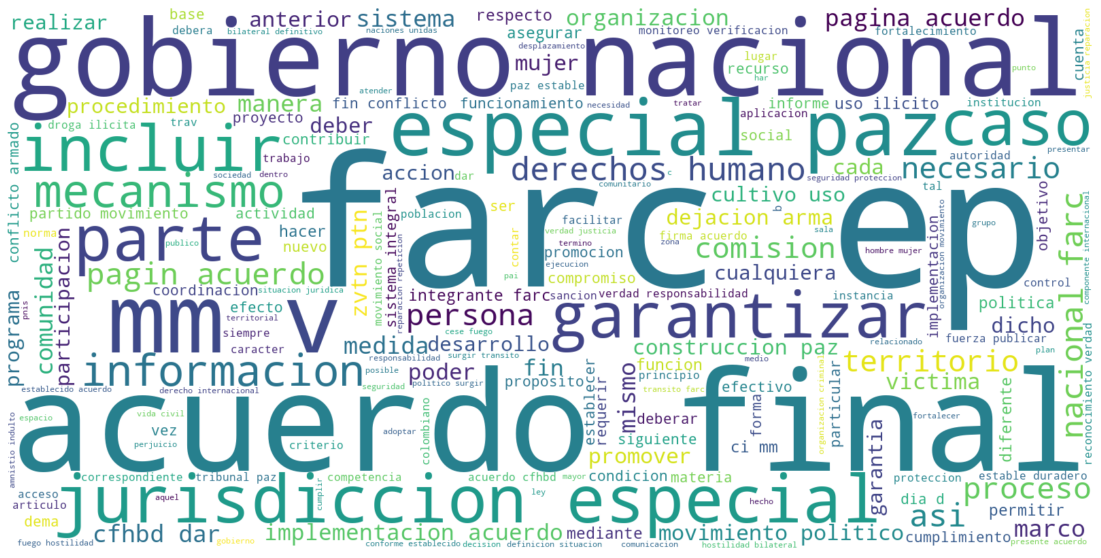

In [180]:
text = " ".join(lemmas)
wordcloud = WordCloud(width = 1600, height = 800, stopwords = stopwords, 
    background_color = "white").generate(text)
plt.figure(figsize = (20, 10))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")
plt.show()